#### **Imports**

In [193]:
from math import factorial
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from matplotlib.ticker import AutoMinorLocator

# For colors
colors = ['crimson','midnightblue', 'violet','orange','springgreen','dodgerblue','darkviolet', 'olive','tomato']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

#### **Exercise 1 + 2**

In [194]:
n , K , k = 60 , 100 , 10
N_ = (K / k) * n
print(f'N could be {int(N_)}, assuming that n/k is representative of the ratio of N to K')

N could be 600, assuming that n/k is representative of the ratio of N to K


In [195]:
def brac(X,Y):
    return factorial(X) / (factorial(Y) * factorial(X - Y) )

def flat_prior(N):
    flat_line = np.ones_like(N)
    return flat_line
    
def hyperbolic_prior(N):
    hyperbola = 1/N
    return hyperbola

def likelihood(N,K,n,k):
    return ( brac(K,k) * brac(N-K,n-k) ) / brac(N,n)

def posterior(N,K,n,k,prior=hyperbolic_prior):
    # likelihood = ( brac(K,k) * brac(N-K,n-k) ) / brac(N,n)
    return likelihood(N,K,n,k) * prior(N)


In [196]:
N_range = 2400 # Upper value of N to go to
n , K = 60 , 100 # n and K values
k_1 , k_2 = 10 , 15 # k values

Like_1 , Like_2 = [] , []
Prob_1 , Prob_2 = [] , []

for N in range(K + (n-k_1),N_range): # Must start at (K + (n - k) ) to ensure no (-1)!
    Like_1.append(likelihood(N,K,n,k_1))
    Prob_1.append(posterior(N,K,n,k_1))

for N in range(K + (n-k_2),N_range):
    Like_2.append(likelihood(N,K,n,k_2))
    Prob_2.append(posterior(N,K,n,k_2))

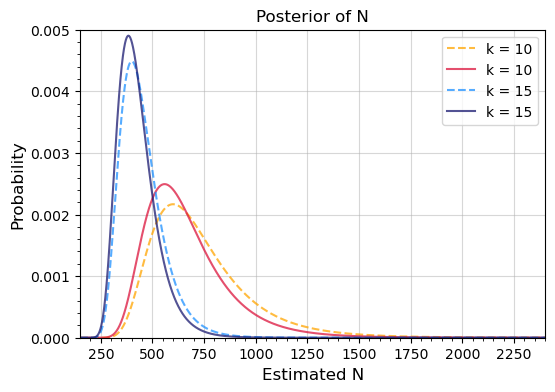

In [197]:
plt.figure(figsize=(6,4))

Like_1_int = np.trapz(Like_1,range(K + (n-k_1),N_range)) # Integrate to normalize
Like_2_int = np.trapz(Like_2,range(K + (n-k_2),N_range))
Prob_1_int = np.trapz(Prob_1,range(K + (n-k_1),N_range))
Prob_2_int = np.trapz(Prob_2,range(K + (n-k_2),N_range))

plt.plot(range(K + (n-k_1),N_range),Like_1 / Like_1_int, alpha = .75,linestyle='--',label='k = 10',color='orange')
plt.plot(range(K + (n-k_1),N_range),Prob_1 / Prob_1_int, alpha = .75,label='k = 10')

plt.plot(range(K + (n-k_2),N_range),Like_2 / Like_2_int, alpha = .75,linestyle='--',label='k = 15',color='dodgerblue')
plt.plot(range(K + (n-k_2),N_range),Prob_2 / Prob_2_int, alpha = .75,label='k = 15')

ax = plt.gca() # For setting sub-ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.title('Posterior of N',fontsize=12)
plt.xlabel('Estimated N',fontsize=12)
plt.ylabel('Probability',fontsize=12)
plt.grid(True,alpha=0.5,zorder=-10)
plt.ylim(0,0.005)
plt.xlim(K + (n-k_1),N_range)
plt.legend()
plt.show()

In [198]:
Nrange_1 = list(range(K + (n-k_1),N_range))
Nrange_2 = list(range(K + (n-k_2),N_range))


max_prob_index = Prob_1.index( max(Prob_1) )  # Find the index of the maximum value
max_like_index = Like_1.index( max(Like_1) )  # Find the index of the maximum value

print(f'For k = 10, best bayesian estimate of N is {Nrange_1[max_prob_index]} for posterior and {Nrange_1[max_like_index]} for likelihood')

max_prob_index = Prob_2.index( max(Prob_2) )  # Find the index of the maximum value
max_like_index = Like_2.index( max(Like_2) )  # Find the index of the maximum value

print(f'For k = 15, best bayesian estimate of N is {Nrange_2[max_prob_index]} for posterior and {Nrange_2[max_like_index]} for likelihood')

For k = 10, best bayesian estimate of N is 559 for posterior and 600 for likelihood
For k = 15, best bayesian estimate of N is 384 for posterior and 399 for likelihood


#### **Exercise Fish**

In [199]:
lake_volume = 5000
lake_volume_sig = 300
volume_per_fish = 10 
v_p_f_sig = 1

K , n , k = 50 , 30 , 4

### Find the standard deviation by error propagation

fishes = lake_volume / volume_per_fish

relative_uncertainty_fish = ((lake_volume_sig / lake_volume) ** 2 + (v_p_f_sig / volume_per_fish) ** 2) ** 0.5
delta_fishes = fishes * relative_uncertainty_fish

In [200]:
def gaussian_prior(N,loc=fishes,scale=delta_fishes):
    gauss = norm.pdf(N,loc,scale)
    return gauss

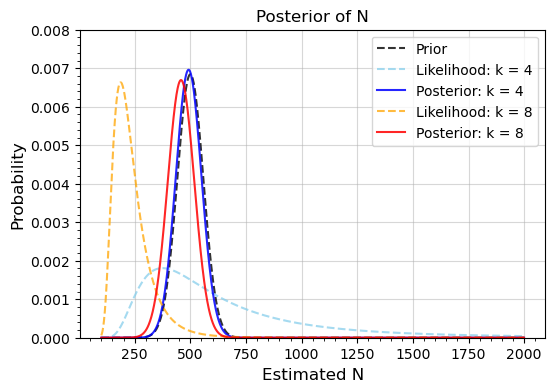

In [203]:
plt.figure(figsize=(6,4))

N_range = np.arange(100,2000,1)

gauss_priors = gaussian_prior(N_range)
integrated_prior = np.trapz(gauss_priors,N_range)

plt.plot(N_range,gauss_priors/integrated_prior, alpha = .8,linestyle='--',color='k',label=f'Prior')

for k , color1 , color2 in zip([4,8],['skyblue','orange'],['blue','red']):
#    N_range = list(range(K + (n-k),1200))
    gauss_likelihoods = np.array([likelihood(N,K,n,k) for N in N_range])
    gauss_likeli_int = np.trapz(gauss_likelihoods,N_range)
    
    gauss_posteriors = np.array([posterior(N,K,n,k,prior=gaussian_prior) for N in N_range])
    gauss_posterior_int = np.trapz(gauss_posteriors,N_range)
    
    plt.plot(N_range,gauss_likelihoods / gauss_likeli_int, alpha = .75,linestyle='--',label=f'Likelihood: k = {k}',color=f'{color1}')
    plt.plot(N_range,gauss_posteriors / gauss_posterior_int, alpha = .85,label=f'Posterior: k = {k}',color=f'{color2}')

ax = plt.gca() # For setting sub-ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.title('Posterior of N',fontsize=12)
plt.xlabel('Estimated N',fontsize=12)
plt.ylabel('Probability',fontsize=12)
plt.grid(True,alpha=0.5,zorder=-10)
plt.ylim(0,0.008)
plt.legend()
plt.show()